# Install dependencies

In [72]:
!pip install pillow==10.3.0
!pip install transformers==4.40.2
!pip install torch==2.3.0

# Import dependencies

In [73]:
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

from src.model_managers import model_loader
from src.pipline import pipeline

# Set device

In [74]:
DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.backends.mps.is_built() or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
    
print(f"Using device: {DEVICE}")

Using device: cpu


# Load models and tokenizer

In [75]:
VOCAB_FILE_PATH = "../assets/vocab.json"
MERGES_FILE_PATH = "../assets/merges.txt"
MODEL_FILE_PATH = "../assets/v1-5-pruned-emaonly.ckpt"

tokenizer = CLIPTokenizer(VOCAB_FILE_PATH, merges_file=MERGES_FILE_PATH)
models = model_loader.preload_models_from_standard_weights(MODEL_FILE_PATH, DEVICE)

# Run Pipeline
## Config Hyperparameters
#- `prompt` (str): The text prompt to be used for generating the output image.
#- `uncond_prompt` (str): Also known as negative prompt. Default: `""`
#- `do_cfg` (bool): Default: `True`
#- `cfg_scale` (int): Default: `8`. min: 1, max: 14
#- `sampler` (str): Default: `"ddpm"`
#- `num_inference_steps` (int): Default: `50`
#- `seed` (int): Default: `42`
#- `strength` (float): Higher values add more noise to input image and will make the output image less similar to it.
#- `input_image` (PIL.Image): The input image to be used for generating the output image. Not need for TTI Default: `None`
#- `idle_device` (str): Default: `"cpu"`
#- `device` (str): The device to be used for generating the output image.
#- `models` (dict): The models to be used for generating the output image.
#- `tokenizer` (transformers.CLIPTokenizer): The tokenizer to be used for generating the output image.

In [76]:
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

sampler = "ddpm"
num_inference_steps = 50
seed = 42

def generate_img(prompt: str, input_img: Image, config: dict):
    return pipeline.generate(
        prompt=prompt,
        input_image=input_img,
        models=models,
        tokenizer=tokenizer,
        device=DEVICE,
        idle_device="cpu",
        **config
    )

In [77]:
# Some sample prompts
prompts = [
    "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution.",
    "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution.",
    "A cat with a hat, looking at the camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution.",
    "A dog with a hat, looking at the camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution.",
    "A serene forest at sunrise, with mist hovering above a carpet of wildflowers, ultra sharp, panoramic view, 70mm lens, 8k resolution.",
    "A majestic eagle soaring over a snow-capped mountain, with the sun setting behind the peaks, high contrast, sharp focus, 200mm lens, 8k resolution.",
    "An astronaut floating in space with Earth in the background, detailed space suit texture, ultra high definition, 50mm lens, 10k resolution.",
    "A futuristic cityscape with neon lights and flying cars, detailed cyberpunk aesthetic, ultra sharp, 35mm lens, 8k resolution.",
    "A medieval castle on a hilltop at sunset, with dramatic lighting and clouds in the sky, high contrast, ultra sharp, 24mm lens, 8k resolution.",
    "A magical forest with glowing mushrooms and fairies, soft focus, dreamy atmosphere, 50mm lens, 8k resolution.",
    "A cozy cabin in the woods with a warm fire burning inside, snow falling outside, soft focus, 50mm lens, 8k resolution.",
    "A jazz band performing live in a smoky bar, detailed instruments, expressions of musicians, cinematic, 75mm lens, high resolution.",
   "A vintage 1920s street scene, classic cars and fashion, bustling city life, sepia tone, detailed historical accuracy, 50mm lens, 8k resolution.",
    "A photojournalist capturing images in a bustling market in Istanbul, camera in hand, candid moments, 55mm lens, 8k resolution.",
    "A group of friends hiking on a mountain trail at sunrise, backpacks on, overlooking a misty valley, panoramic view, 24mm lens, 6k resolution.",
   "Children playing in a splash of water from a broken fire hydrant on a hot summer day in New York, spontaneous joy, ultra sharp, 100mm lens, 8k resolution.",
    "An elderly couple walking hand in hand along a beach at sunset, reflecting on a lifetime together, soft focus, 60mm lens, high resolution.",
]

night_city_prompts = [
    "Panoramic cityscape at night, skyscrapers lit by countless windows, reflective river in the foreground, ultra wide angle, 12k resolution.",
    "Aerial view of a city at night, illuminated streets and highways, no human activity, high detail, 70mm lens.",
    "City skyline silhouette against twilight, blue and purple gradients of dusk, telephoto lens, 8k resolution.",
    "Close-up on architectural details of a city building at night, patterns of windows and structural designs, geometric focus, 85mm lens, ultra sharp.",
    "Deserted streets of an old town area in a city at night, medieval architecture under soft street lights, historical textures, 50mm lens, high resolution.",
    "Deserted bridge over a calm river in a city at night, lights creating reflections on water, tranquil scene, long exposure, 100mm lens.",
    "Frozen lake in a city park at night, city lights reflecting on surface, untouched snow leading to skyline, wide angle, 6k resolution.",
    "Cityscape from a hill at night, overlooking lights with mountains in the background, clear skies, 35mm lens.",
    "Modern city library exterior at night, unique architecture highlighted by innovative lighting, no people, 24mm lens, ultra HD.",
    "Deserted urban alley at night, lined with neon signs and closed shops, silent and eerie, cinematic, 55mm lens, 8k resolution."
]

## Generate image from text

In [78]:
config_tti = {
    "uncond_prompt": uncond_prompt,
    "do_cfg": do_cfg,
    "cfg_scale": cfg_scale,
    "strength": .9,
    "sampler_name": sampler,
    "n_inference_steps": num_inference_steps,
    "seed": seed
}

100%|██████████| 50/50 [17:46<00:00, 21.34s/it]


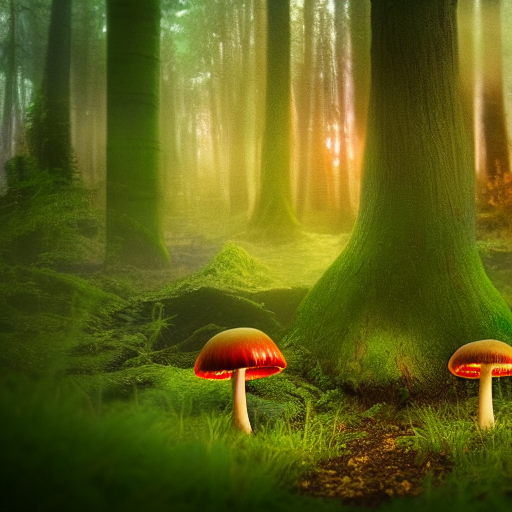

In [79]:
output_image_tti = generate_img(prompts[9], None, config_tti)
# Combine the input image and the output image into a single image.
Image.fromarray(output_image_tti)

100%|██████████| 50/50 [09:10<00:00, 11.01s/it]


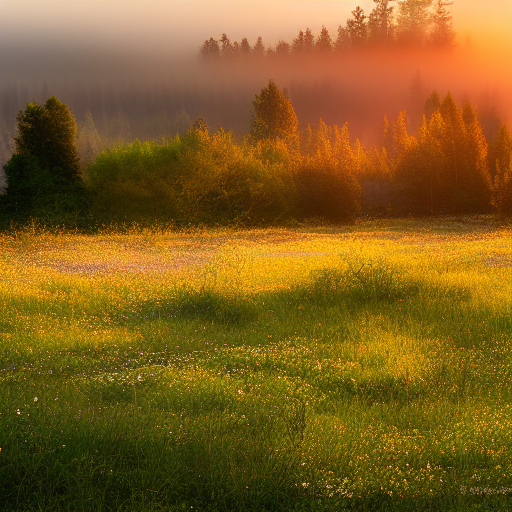

In [80]:
output_image_tti_2 = generate_img(prompts[4], None, config_tti)
# Combine the input image and the output image into a single image.
Image.fromarray(output_image_tti_2)

100%|██████████| 50/50 [09:05<00:00, 10.91s/it]


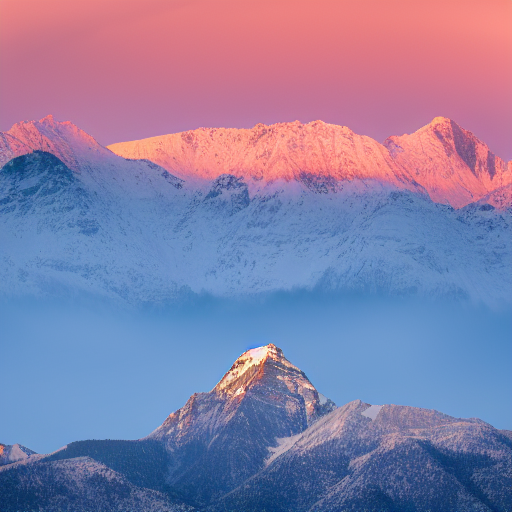

In [81]:
output_image_tti_3 = generate_img(prompts[5], None, config_tti)
# Combine the input image and the output image into a single image.
Image.fromarray(output_image_tti_3)

## Generate image from image

In [82]:
config_iti = {
    "uncond_prompt": uncond_prompt,
    "do_cfg": do_cfg,
    "cfg_scale": cfg_scale,
    "strength": .6,
    "sampler_name": sampler,
    "n_inference_steps": num_inference_steps,
    "seed": seed
}

100%|██████████| 30/30 [05:28<00:00, 10.95s/it]


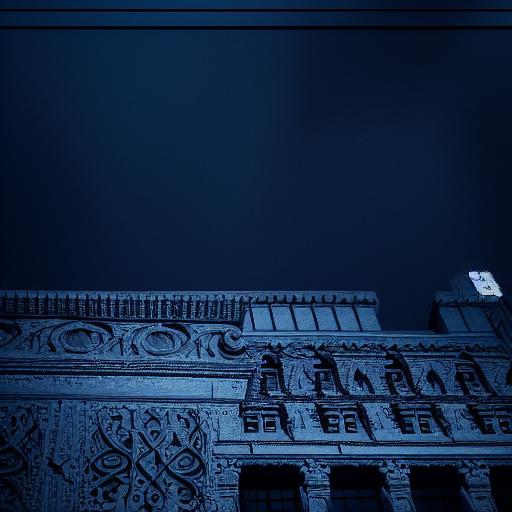

In [83]:
output_image_iti = generate_img(night_city_prompts[3], Image.open("../assets/images/nightcity.jpg"), config_iti)
# Combine the input image and the output image into a single image.
Image.fromarray(output_image_iti)

100%|██████████| 30/30 [06:12<00:00, 12.41s/it]


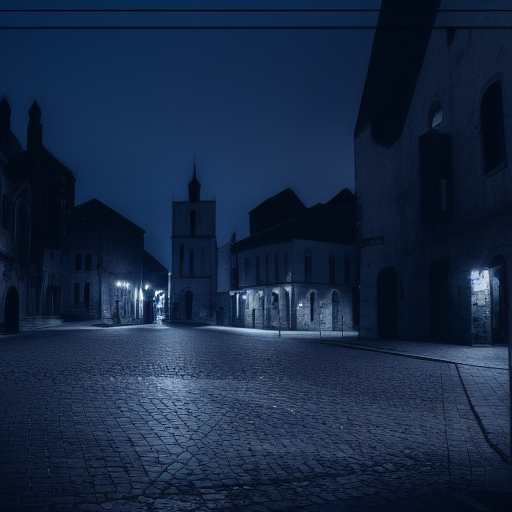

In [86]:
output_image_iti_2 = generate_img(night_city_prompts[4], Image.open("../assets/images/nightcity.jpg"), config_iti)
# Combine the input image and the output image into a single image.
Image.fromarray(output_image_iti_2)

100%|██████████| 30/30 [05:40<00:00, 11.36s/it]


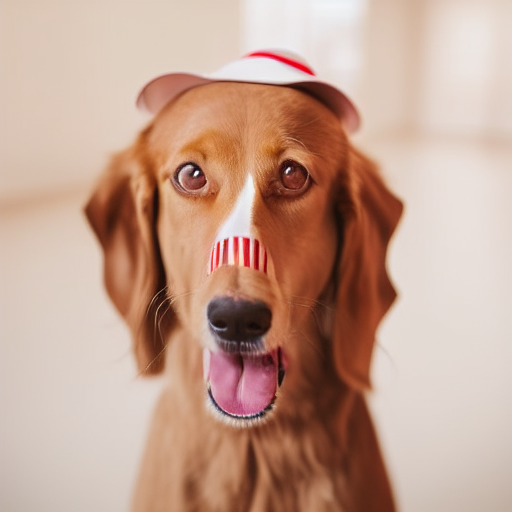

In [85]:
output_image_iti_3 = generate_img(prompts[3], Image.open("../assets/images/dog.jpg"), config_iti)
# Combine the input image and the output image into a single image.
Image.fromarray(output_image_iti_3)